# House Prices: Advanced Regression Techniques

We entered into a competition on Kaggle named 'House Prices: Advanced Regression Techniques'. Here, we are given sets of exploratory data with which we are to build a model predicting the sale price of houses in Ames, Iowa.

We were provided with the following files:

* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms.

Now let's get into it!

Firstly, we will import the various relevant libraries to be used in our project. We will use a combination of data-manipulating and statistics modules and libraries.

In [1]:
#data manipulating libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 81)
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,8)

#statistics libraries
from scipy import stats
from scipy.stats import skew,norm, kurtosis
from scipy.stats.stats import pearsonr


# Data Cleaning and Formatting

## Load in the Data and Examine

We will load our data into a `pandas` dataframe, one of the most useful data structures for data science. With pandas we can easily manipulate, clean, and visualize the provided data. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible, many of which we will discuss and implement in this notebook.

In [2]:
#Call the datasets
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
test_df1 = pd.read_csv('../input/test.csv')

Let us look at the first five rows of our `train` dataset.

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, we will remove the 'Id' column from both the `train` and `test` datasets as it is not useful in our analysis. This is our first step in cleaning the data.

In [4]:
#remove IDs from train_df and test_df
train_df.drop("Id", axis = 1,inplace = True)
test_df.drop("Id",axis = 1, inplace= True)

Now, let us look at the top 5 rows of our dataset.

In [5]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see above, the 'Id' column has succesfully been removed from the `train` and `test` datasets.

## Data Types and Missing Values

Using the `DataFrame.info()` method, we will now look at the data types and number of non-missing values of each column in the `train` dataset. Knowing the data types of each column is a useful start to knowing how to approach the respective data moving forward, and knowing the amount of non-missing values provides an idea of which columns we might need to drop at a later stage.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

# Exploratory Data Analysis

[Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an open-ended process in which we create plots and implement statistical analysis in order to explore our data. The purpose of EDA is to find anomalies, patterns, trends, or relationships between the data. These may be interesting by themselves (for example, finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use moving forward. The goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. It is therefore an integral part of regression, hence we will be using it in cleaning our data.

To begin the EDA process, we will focus on a single variable, the SalePrice, because this is the target for our machine learning model.

Firstly, using the `DataFrame.describe()` feature, we will load a descriptive statistical summary for SalePrice. Given that this is the target variable, it is not included in the `test` data so we will load it from the `train` data.

`count` displays the total number of rows in the series. For numerical data, Series.describe() also gives the `mean`, `std`, `min` and `max` values as well.

In [7]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of a house in our dataset is 180,921 dollars, with most of the values falling within the 130,000 to 215,000-dollar range.

## Single Variable Plot

A single variable called [univariate](https://en.wikipedia.org/wiki/Univariate_(statistics)) plot shows the distribution of a single variable such as in a histogram.

Using the `DataFrame.skew()` feature, we will check for skewness, which is a measure of the shape of the distribution of values. We will also use the `DataFrame.kurtosis()` feature to return an unbiased kurtosis over our plot axis.

skewness: 1.882876
kurtosis: 6.536282


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


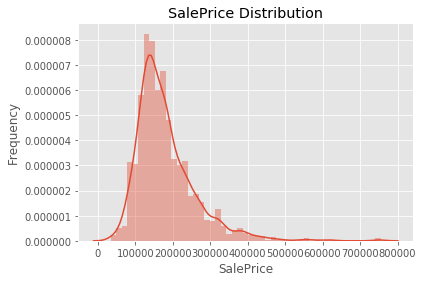

In [8]:
sns.distplot(train_df.SalePrice);
plt.ylabel('Frequency');
plt.title('SalePrice Distribution');
print("skewness: %f" % train_df['SalePrice'].skew())
print("kurtosis: %f" % train_df['SalePrice'].kurtosis())

The above graph shows us that this distribution is positively skewed.

It might make sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data and thus satisfy the assumptions of linear regression.

`np.log()` will transform the variable. We will also re-plot the distribution.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


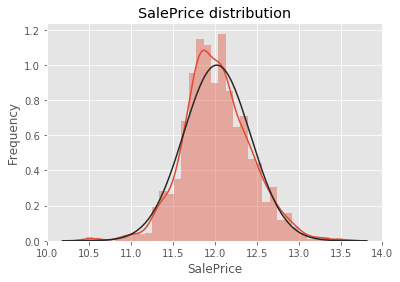

In [9]:
#log transform the target 
train_df["SalePrice"] = np.log(train_df["SalePrice"])

#Kernel Density plot
sns.distplot(train_df.SalePrice, fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

We see visually that the data now resembles a normal distribution. The skewness for a normal distribution is zero (which is ideally what we want to achieve), and by log-transforming the target variable we normalize the data and our skewness nears zero.

We will now print the new skewness and kurtosis values of our distibution.

In [10]:
print("skewness: %f" % train_df['SalePrice'].skew())
print("kurtosis: %f" % train_df['SalePrice'].kurtosis())

skewness: 0.121335
kurtosis: 0.809532


We transformed the skewness and kurtosis of the data from 1.882876 to 0.121335 and 6.536282 to 0.809532 respectively, which indicates that our distribution is now more normalized.

## Correlations between Features and Target

In order to quantify the correlations between the features (variables) and the target, we will calculate the [Pearson correlation coefficient](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). This is a measure of the strength and direction of a linear relationship between two variables. A value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.

We will do this using the DataFrame.corr() method, and display the results in a heatmap.

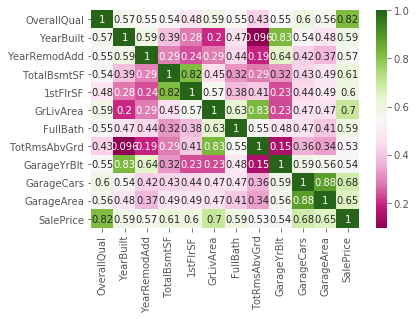

In [11]:
corrmap = train_df.corr()
top_corr_features = corrmap.index[abs(corrmap["SalePrice"])>0.5]
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="PiYG")

From the above heatmap, we can see that the features `OverallQual`, `GrLivArea` and `TotalBsmtSF` are highly positively correlated with `SalePrice`. 

`GarageCars` and `GarageArea` are also correlated with each other, since the number of cars that will fit into the garage will depend on `GarageArea`.

For the sake of creating a simplified analysis, we will now only look at the top 3 features that are the most correlated with SalePrice. We will plot this in a scatter plot, which are `TotalBsmtSF`, `GrLivArea` and `GarageArea`.

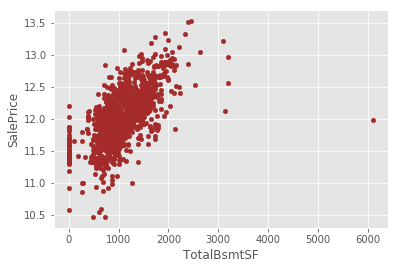

In [12]:
#Checking correlation against the SalePrice
col ='TotalBsmtSF'
data = pd.concat([train_df['SalePrice'],train_df[col]],axis=1)
data.plot.scatter(x=col, y='SalePrice', color='Brown');
plt.show()

Given that outliers might have a dramatic effect on linear regression, ie. leading to a bad prediction or estimation, we decided to remove the outliers from our scatterplot. To do so, we will use the statistical equations described coded below. These in turn give us the threshold (upper and lower) where the data should be cut off.

In [13]:
first_quartile = train_df['TotalBsmtSF'].describe()['25%']
third_quartile = train_df['TotalBsmtSF'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
train_df = train_df[(train_df['TotalBsmtSF'] > (first_quartile - 3 * iqr)) &
            (train_df['TotalBsmtSF'] < (third_quartile + 3 * iqr))]

With the outliers removed, we will now re-plot the scatterplot of the top 3 features that are most correlated with SalePrice.

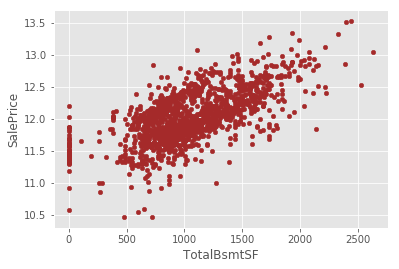

In [14]:
col ='TotalBsmtSF'
data = pd.concat([train_df['SalePrice'],train_df[col]],axis=1)
data.plot.scatter(x=col, y='SalePrice', color='Brown');

We notice from the above graph that outliers have been successfully removed, so we can continue with the EDA. We will now plot similar graphs for `GrLivArea` and `GarageArea` against `SalePrice` respectively.

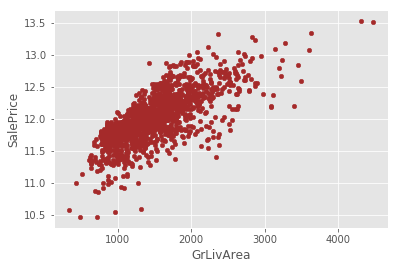

In [15]:
col ='GrLivArea'
data =pd.concat([train_df['SalePrice'], train_df[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', color='brown');

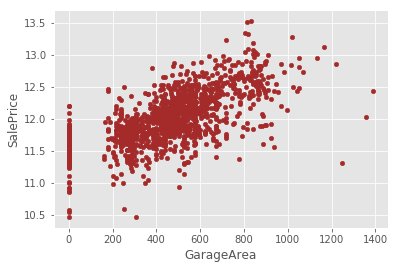

In [16]:
#scatter plot GarageArea/SalePrice
col = 'GarageArea'
res =pd.concat([train_df['SalePrice'], train_df[col]], axis=1)
res.plot.scatter(x=col,y='SalePrice', color='brown');


# Missing Values

Given that missing values can affect regression by creating bias, it is important to know how much of our data is missing. We can start this analysis by looking at the percentage of missing values in each column. In machine learning, these need to filled in.

We will calculate the number and percentage of missing values for each column. Firstly, we will concatenate the training and test datasets to form a new dataframe named `house_df` because it will be easy to deal with missing values in one dataframe.

In [17]:
house_df = pd.concat((train_df.loc[:, 'MSSubClass': 'SaleCondition'], test_df.loc[:,'MSSubClass':'SaleCondition']))

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = house_df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * house_df.isnull().sum() / len(house_df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Let us now find out the number of columns that have missing values, and display this in table format.

In [18]:
missing_values_table(house_df)

This dataframe has 79 columns.
There are 34 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,2905,99.7
MiscFeature,2809,96.4
Alley,2716,93.2
Fence,2343,80.4
FireplaceQu,1420,48.7
LotFrontage,485,16.6
GarageFinish,159,5.5
GarageQual,159,5.5
GarageCond,159,5.5
GarageYrBlt,159,5.5


Let us show the above table results in a bar graph:

Text(0.5, 1.0, 'Total Missing Value (%)')

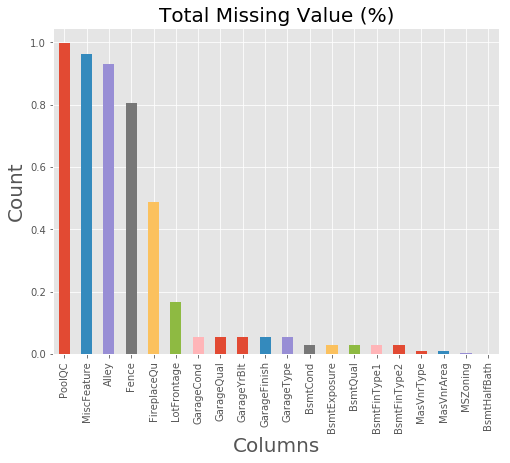

In [19]:
total = house_df.isnull().sum().sort_values(ascending=False)
percent = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

The above bar graph tells us that the `PoolQC`, `MiscFeature`, `Alley` and `Fence` columns have over 80% of missing values.

Now, we will calculate the precise number of missing values per column.

In [20]:
#Checking on missing values - Categorical variables
house_df.select_dtypes(include='object').isnull().sum()[house_df.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2716
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      79
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2905
Fence           2343
MiscFeature     2809
SaleType           1
dtype: int64

Now, let us check the shape of our new concatenated dataframe `house_df`:

In [21]:
house_df.shape

(2914, 79)

<h3>Imputing Missing Values</h3>

Depending on the categorical variable, missing value can either mean "None" (which we will fill with "None") or "Not Available" (which we will fill with the mode). For the below categorical basement-related feature NaN means that there is no basement.

In [22]:
for column in ('Alley', 'Utilities', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
            'MiscFeature', 'MSSubClass'):
    house_df[column] = house_df[column].fillna('None')

<h3>Setting Mode Values for Missing Entries</h3>

In [23]:
for column in ('MSZoning', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType', 'Electrical'):
    house_df[column] = house_df[column].fillna(house_df[column].mode()[0])

In [24]:
#functional: NA is typical
house_df["Functional"] = house_df["Functional"].fillna('Typ')

In [25]:
#fill missing value with median Lot frontage of all the neighboorhood
house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [26]:
#Numerical variables
house_df.select_dtypes(include = ['float', 'int']).isnull().sum()[house_df.select_dtypes(include = ['int', 'float']).isnull()
                                                                 .sum() > 0]

MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [27]:
#Some "NAs" means "None" (which I will fill with 0) or means "Not Available" (which I will fill with mean)
for col in ('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
            'GarageCars', 'GarageArea'):
    house_df[col] = house_df[col].fillna(0)

### Checking if all null values were removed

Let us now check if null values were successfully removed.

We will print the number of null values present our dataset.

In [28]:
print(house_df.isnull().sum().sum())

0


In [29]:
#house_df = house_df.drop(['Utilities'], axis=1)

Our output is 0, meaning that there are no null values present in our dataframe thus our earlier removal was indeed successful.

<h3>Transforming Required Numerical Features to Categorical</h3>

We will now transform some numerical features to categorical of type string so we can be able to label encode them for our prediction.

In [30]:
#Transforming required numerical features to categorical 
house_df['MSSubClass']= house_df['MSSubClass'].apply(str)
house_df['OverallCond'] =house_df['OverallCond'].astype(str)
house_df['YrSold'] = house_df['YrSold'].astype(str)
house_df['MoSold'] = house_df['MoSold'].astype(str)

Label Encoding some categorical variables for information in their ordering set:

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#Label Encoding some categorical variables
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#apply LabelEncoder to categorical features
for c in cols:
    label = LabelEncoder()
    label.fit(list(house_df[c].values))
    house_df[c] = label.transform(list(house_df[c].values))

In [33]:
print(house_df.shape)

(2914, 79)


Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house. It is possible for some one-story houses to be larger than ones with more than one floor. Therefore, creating this feature makes it possible for the `SalePrice` to not be dependent on the number of stories, but rather the area of the house in its entirety.

In [34]:
house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']

## Skew in numerical Features

In [35]:
# skewed numeric features 
numeric_features = house_df.dtypes[house_df.dtypes != "object"].index

skewed_features = house_df[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\nskew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)


skew in numerical features: 



,Skew
MiscVal,21.928383
PoolArea,17.679480
LotArea,13.107585
LowQualFinSF,12.078203
3SsnPorch,11.366100
LandSlope,4.970397
KitchenAbvGr,4.297992


<h3>BoxCox Transformation of Highly Skewed Features</h3>

Linear Regression depends on normality assumptions. Significant skewness and kurtosis on the training dataset clearly indicate that data is not normal. If a data set exhibits significant skewness or kurtosis we apply some type of transformation to try to make the data normal, or more nearly normal. The Box-Cox transformation is a useful technique for trying to normalize a data set. In particular, taking the log or square root of a data set is often useful for data that exhibit moderate right skewness.

We will thus calculate the number of number of skewed numerical features to box cox-transform.

In [36]:
#Box cox transforming
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    house_df[feat] = boxcox1p(house_df[feat], lam)

There are 59 skewed numerical features to box cox transform


<h3>Creating dummy variables </h3>

Next, we will use the `pandas.get_dummies()` feature to turn categorical variables into a series of zeros and ones, which will make them significantly easier to quantify and compare moving forward.

In [37]:
#adding dummies to categorical features
house_df = pd.get_dummies(house_df)
print(house_df.shape)

(2914, 224)


Below is the top 5 rows from our combined dataset (`house_df`) with our dummy variables populated.

In [38]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,8.897844,12.792276,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,9.917060,11.892039,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,10.468500,11.354094,1.194318,0.730463,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,10.221051,12.510588,0.000000,0.730463,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Next, we will split our earlier concatenated `house_df` back into `train` and `test` dataframes.

In [39]:
ntrain_df = train_df.shape[0]
ntest_df = test_df.shape[0]
y_train= train_df.SalePrice.values
train_df = house_df[:ntrain_df]
test_df = house_df[ntrain_df:]

In [40]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,8.897844,12.792276,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,9.917060,11.892039,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,10.468500,11.354094,1.194318,0.730463,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,10.221051,12.510588,0.000000,0.730463,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,2.055642,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<h1>Modelling</h1>

<h4>We will be implementing the following models:</h4>

1. Linear Regression <br/>
2. Ridge Regression <br/>
3. Lasso Regression <br/>
4. Decision Tree <br/>
5. Random Forest <br/>

We will firstly split our dataset into training and testing sets, and then fit and predict a linear regression over all features.

In addition to computing the R^2 score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [41]:
 # Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = y_train
X = house_df[:ntrain_df].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
#commonly used metric to evaluate regression models

print("Linear Regression Test Set:")
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Linear Regression Test Set:
R^2: 0.8875921611440927
Root Mean Squared Error: 0.13512476064185341


Our `test` R^2 is 0.8875921611440927.

Additionally, `train` our RMSE is 0.13512476064185341.

In [42]:
print("Linear Regression Train Set:")
y_pred = reg_all.predict(X_train)
print("R^2: {}".format(reg_all.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Linear Regression Train Set:
R^2: 0.9473325193108257
Root Mean Squared Error: 0.0905945521752312


From the above results we notice that the RMSE of the `train` set is smaller than the `test` set, thus leading us to utilizing Ridge Regression.

# Ridge Regression

Ridge Regression shrinks model parameters, therefore it is mostly used to prevent multicollinearity. It reduces the model complexity by coefficient shrinkage, and uses L2 regularization technique.

In [43]:
from sklearn.linear_model import Ridge

In [44]:
ridge = Ridge()

In [45]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
ridgee = ridge.predict(X_test)
# Compute and print R^2 and RMSE
#commonly used metric to evaluate regression models
print("Ridge Regression Test Set:")
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridgee))
print("Root Mean Squared Error: {}".format(rmse))

Ridge Regression Test Set:
R^2: 0.9064525236043971
Root Mean Squared Error: 0.12326866047189829


In [47]:
print("Ridge Regression Train Set:")
y_pred = ridge.predict(X_train)
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Ridge Regression Train Set:
R^2: 0.9442801098971157
Root Mean Squared Error: 0.09318283853474253


# Lasso

In case of lasso, even at smaller alphas, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

Lasso uses L1 regularization technique.
Lasso is generally used when we have more number of features, because it automatically does feature selection.

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso = Lasso(alpha=0.001, normalize=True)

In [50]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
y_pred = lasso.predict(X_test)
# Compute and print R^2 and RMSE
#commonly used metric to evaluate regression models
print("Lasso Regression Test Set:")
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Lasso Regression Test Set:
R^2: 0.860723193473513
Root Mean Squared Error: 0.15040976707755715


In [52]:
print("Lasso Regression Train Set:")
y_pred = lasso.predict(X_train)
print("R^2: {}".format(lasso.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Lasso Regression Train Set:
R^2: 0.8746568679668011
Root Mean Squared Error: 0.13975941735692402


# Decision Tree Regressor Model

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [54]:
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)
y_pred = regr_tree.predict(X_test)
# Compute and print R^2 and RMSE
#commonly used metric to evaluate regression models
print("Decision Trees Test Set:")
print("R^2: {}".format(regr_tree.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Decision Trees Test Set:
R^2: 0.587644556932374
Root Mean Squared Error: 0.2588049057900467


In [55]:
print("Decision Trees Train Set:")
y_pred = regr_tree.predict(X_train)
print("R^2: {}".format(regr_tree.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Decision Trees Train Set:
R^2: 0.6569887591369798
Root Mean Squared Error: 0.23119848637491544


# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

random.fit(X_train, y_train)
y_pred1 = random.predict(X_test)
# Compute and print R^2 and RMSE
#commonly used metric to evaluate regression models
print("Random Forest Test Set:")
print("R^2: {}".format(random.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error: {}".format(rmse))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Test Set:
R^2: 0.8487853435627183
Root Mean Squared Error: 0.1567233052043815


In [57]:
print("Random Forest Train Set:")
y_pred = random.predict(X_train)
print("R^2: {}".format(random.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Random Forest Train Set:
R^2: 0.9745244579082115
Root Mean Squared Error: 0.06300754049753904


In [58]:
simple_avg = (reg_all.predict(test_df.values) + ridge.predict(test_df.values) + lasso.predict(test_df.values) + random.predict(test_df.values) ) / 4


In [59]:
# shape to export
from pandas import DataFrame
my_pred = np.expm1(simple_avg)

new_res = my_pred *1
result = pd.DataFrame({'Id':test_df1.Id, 'SalePrice':new_res})
result.to_csv('Kwazi_Sample_submission.csv', index=False)
result.head()

,Id,SalePrice
0,1461,121765.961653
1,1462,162966.727053
2,1463,180298.384653
3,1464,186232.679220
4,1465,194573.522068
